# Google Play Store Analysis

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("../datasets/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data Preprocessing

In [9]:
df = df.drop(['App','Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1)

In [10]:
df[df.Type == '0']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN


In [11]:
# Dropping the col with index '10472' as we can't decide about category
df.drop(10472, inplace = True)
df.reset_index(drop=True, inplace=True)

#### Handling inconsistent values of columns 

In [12]:
df.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
dtype: int64

### `Size` Column

In [13]:
df.Size  

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10835                   53M
10836                  3.6M
10837                  9.5M
10838    Varies with device
10839                   19M
Name: Size, Length: 10840, dtype: object

In [14]:
df.Size = df.Size.str.replace('M', '000')
df.Size = df.Size.str.replace('k','')
df.Size = df.Size.replace("Varies with device", "0")
df.Size = df['Size'].map(lambda x: str(float(x)*1000) if not x.isdecimal() else x)
df.Size = df.Size.replace("0", np.nan)
df['Size'] = df['Size'].astype(float)
df.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10835    53000.0
10836     3600.0
10837     9500.0
10838        NaN
10839    19000.0
Name: Size, Length: 10840, dtype: float64

In [15]:
df.Size.value_counts()

11000.0    198
12000.0    196
14000.0    194
13000.0    191
15000.0    184
          ... 
322.0        1
847.0        1
924.0        1
545.0        1
511.0        1
Name: Size, Length: 458, dtype: int64

### `Installs` Column

In [16]:
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10835         5,000+
10836           100+
10837         1,000+
10838         1,000+
10839    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [17]:
df.Installs = df.Installs.str.replace(',', '')
df.Installs = df.Installs.str.replace('+', '')
df.Installs = df.Installs.astype('int')
df.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

### `Price` Column

In [18]:
df.Price = df.Price.str.replace('$','')
df.Price = df.Price.astype('float')
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

### `Content_Rating` Columns

In [19]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Changing datatypes of Columns

In [20]:
df.Reviews = df.Reviews.astype('float')
df.Rating = df.Rating.astype('float')

### `Type` Column

In [21]:
df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [22]:
df[df.Type.isna() == True]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
9148,FAMILY,NaN,0.0,NaN,0,NaN,0.0,Everyone 10+


In [23]:
df.at[9148, 'Type'] = 'Free'

In [24]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone


In [25]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21517.458065,1.546434e+07,1.027368
std,0.515219,2.927761e+06,22588.038238,8.502936e+07,15.949703
min,1.000000,0.000000e+00,11.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4900.000000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [26]:
df.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
dtype: int64

## Exploratory Data Analysis

#### Univariate Analysis

In [27]:
def plot_univariate_cols(x, y, y_label, x_label, title, color, ax):
    bar = sns.barplot(x = x, y = y, ax = ax, orient = 'h')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        ax.text(v + 3, i + .20, str(v), color='black', fontweight='bold')
    return bar

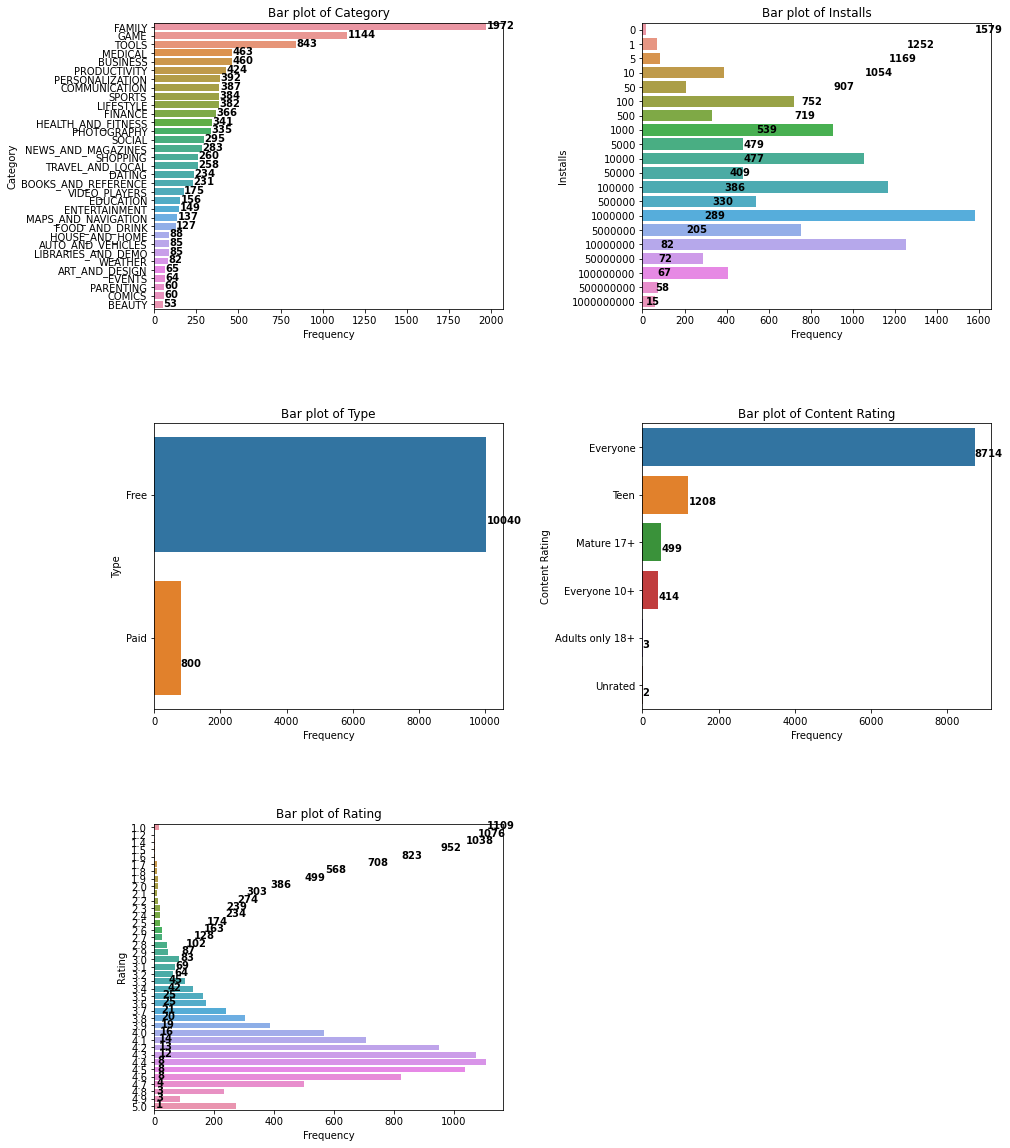

In [28]:
cols = ['Category', 'Installs', 'Type', 'Content Rating', 'Rating']
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for col in cols:
    ax = fig.add_subplot(3, 2, i)
    plot_univariate_cols(x = df[col].value_counts(), y = df[col].value_counts().index, x_label = 'Frequency',y_label = col,title = 'Bar plot of {}'.format(col),color='red',ax=ax)
    i += 1

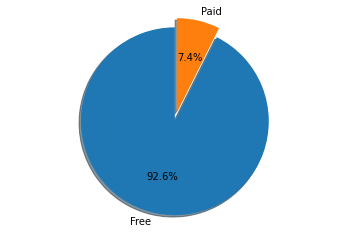

In [29]:
labels = df.Type.value_counts().index
sizes = df.Type.value_counts().values
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Paid')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

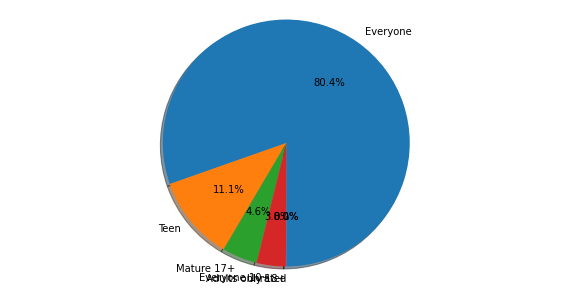

In [30]:
labels = df['Content Rating'].value_counts().index
sizes = df['Content Rating'].value_counts().values

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90)
ax1.axis('equal')
plt.show()

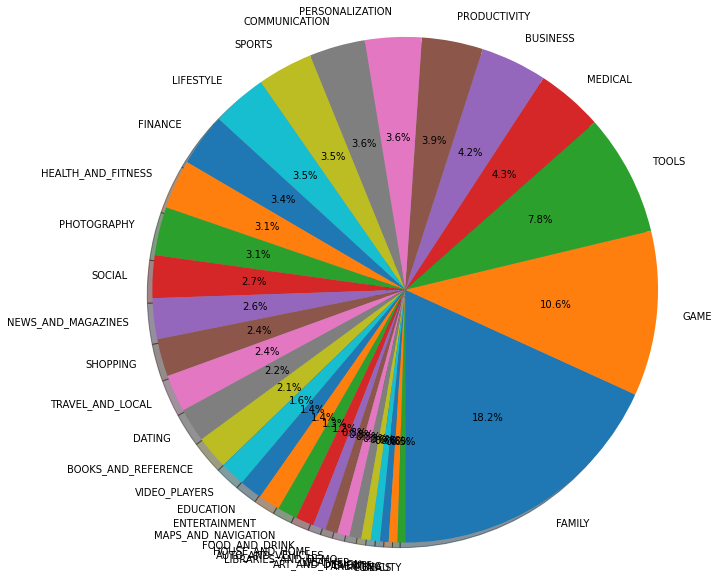

In [31]:
labels = df.Category.value_counts().index
sizes = df['Category'].value_counts().values

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90)
ax1.axis('equal') 
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Density'>

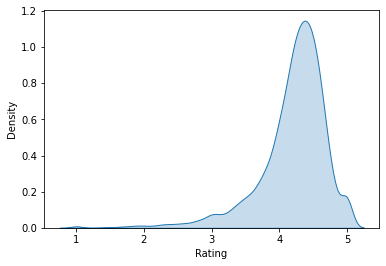

In [32]:
sns.kdeplot(shade=True,data=df['Rating'])

<AxesSubplot:xlabel='Installs', ylabel='Density'>

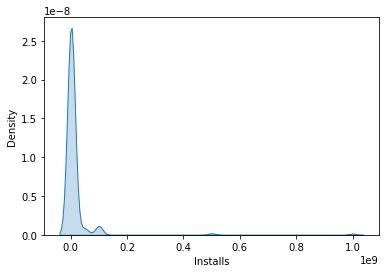

In [33]:
sns.kdeplot(shade=True,data=df['Installs'])

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

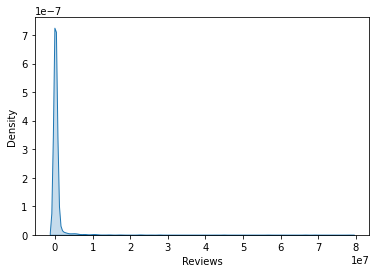

In [34]:
sns.kdeplot(shade=True,data=df['Reviews'])

<AxesSubplot:xlabel='Size', ylabel='Density'>

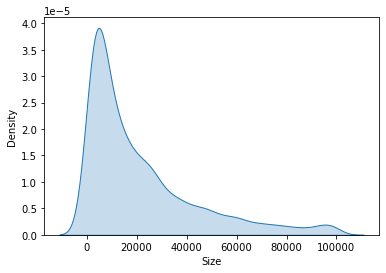

In [35]:
sns.kdeplot(shade=True,data=df['Size'])

#### Bivariate Analysis

<AxesSubplot:xlabel='Rating', ylabel='Category'>

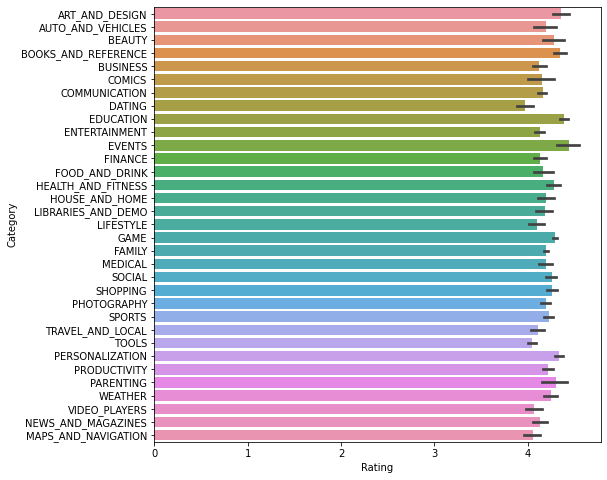

In [36]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating', y='Category', data=df)

<AxesSubplot:xlabel='Installs', ylabel='Category'>

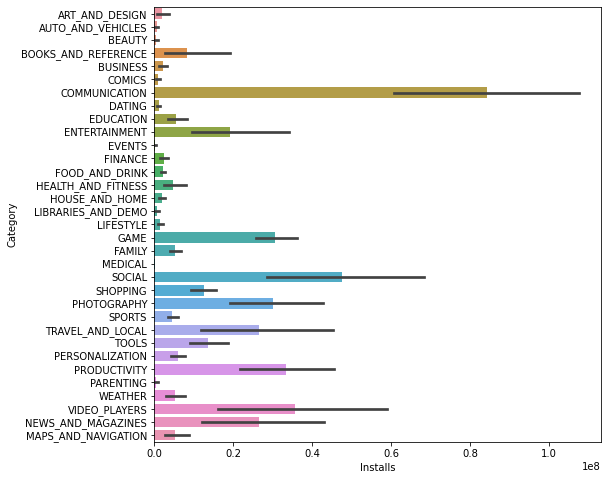

In [37]:
plt.figure(figsize=(8,8))
sns.barplot(x='Installs', y='Category', data=df)

<AxesSubplot:xlabel='Reviews', ylabel='Category'>

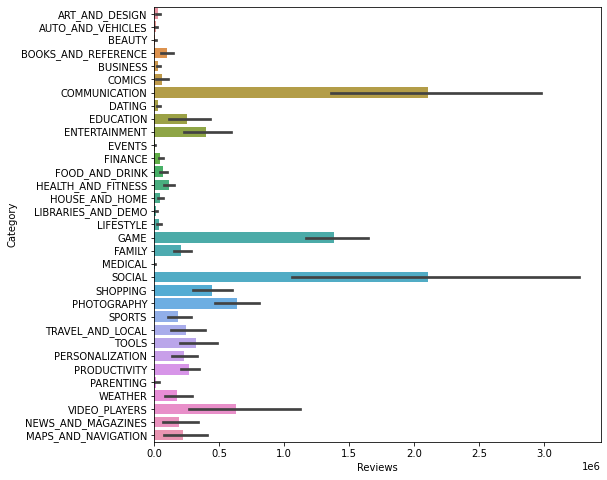

In [38]:
plt.figure(figsize=(8,8))
sns.barplot(x='Reviews', y='Category', data=df)

<AxesSubplot:xlabel='Type', ylabel='Rating'>

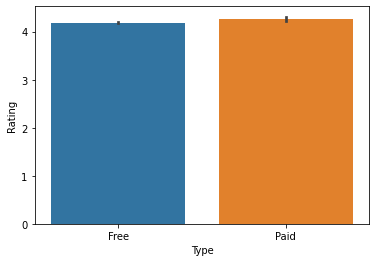

In [39]:
sns.barplot(y='Rating', x='Type', data=df, orient = 'v')

<AxesSubplot:xlabel='Type', ylabel='Installs'>

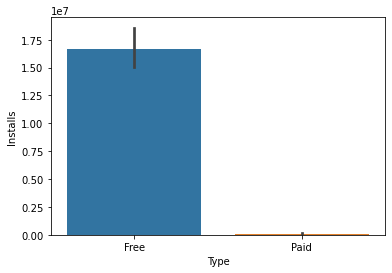

In [40]:
sns.barplot(y='Installs', x='Type', data=df, orient = 'v')

<AxesSubplot:xlabel='Type', ylabel='Reviews'>

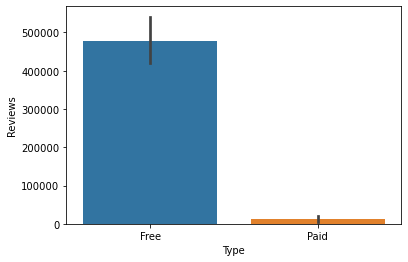

In [41]:
sns.barplot(x='Type', y='Reviews', data=df, orient = 'v')

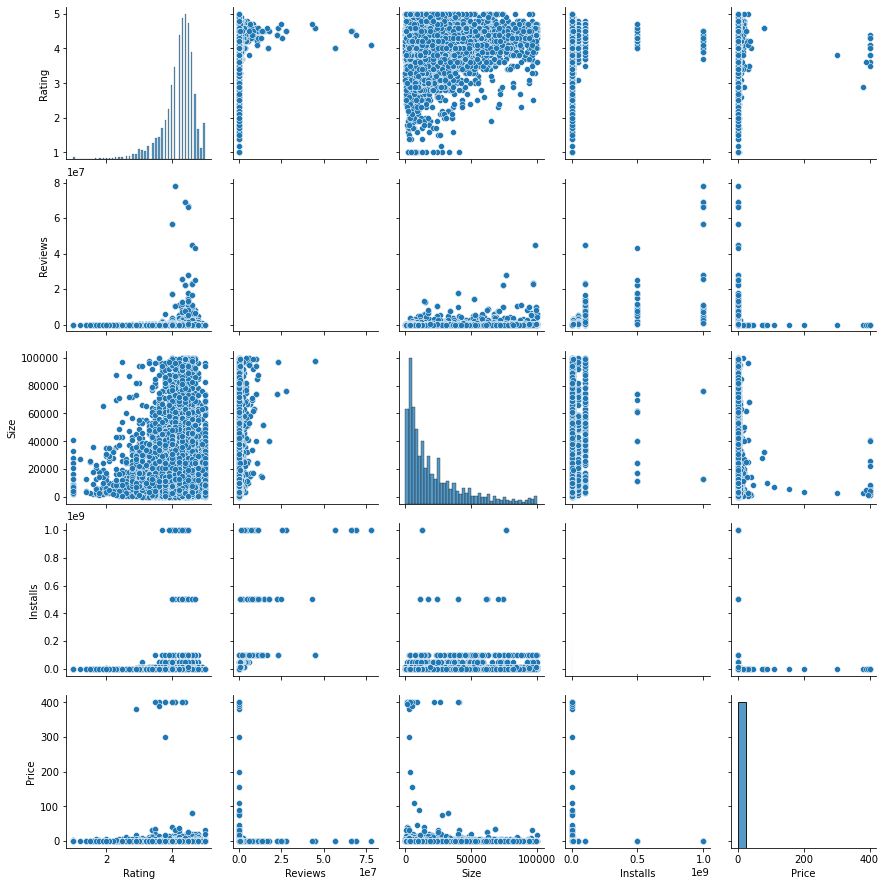

In [42]:
sns.pairplot(df)

<AxesSubplot:>

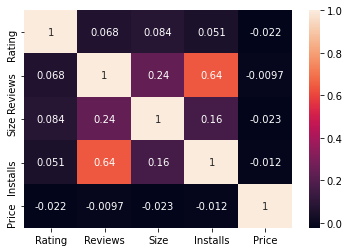

In [43]:
corr = df.corr()
sns.heatmap(data=corr, annot=True)

#### Removing Skewness of Data

In [44]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21517.458065,1.546434e+07,1.027368
std,0.515219,2.927761e+06,22588.038238,8.502936e+07,15.949703
min,1.000000,0.000000e+00,11.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4900.000000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [45]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone


In [46]:
cols = [ 'Reviews', 'Size', 'Installs', 'Rating']
for col in cols:
    df[col] = np.log(df[col])
    
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,1.410987,5.068904,9.852194,9.210340,Free,0.0,Everyone
1,ART_AND_DESIGN,1.360977,6.874198,9.546813,13.122363,Free,0.0,Everyone
2,ART_AND_DESIGN,1.547563,11.379508,9.071078,15.424948,Free,0.0,Everyone
3,ART_AND_DESIGN,1.504077,12.281384,10.126631,17.727534,Free,0.0,Teen
4,ART_AND_DESIGN,1.458615,6.874198,7.937375,11.512925,Free,0.0,Everyone


In [47]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,1.423435,-inf,9.345930,-inf,1.027368
std,0.150170,NaN,1.293306,NaN,15.949703
min,0.000000,-inf,2.397895,-inf,0.000000
25%,1.386294,3.637586e+00,8.496990,6.907755e+00,0.000000
50%,1.458615,7.646831e+00,9.472705,1.151293e+01,0.000000
75%,1.504077,1.091100e+01,10.308953,1.542495e+01,0.000000
max,1.609438,1.817425e+01,11.512925,2.072327e+01,400.000000


In [48]:
df.Reviews.value_counts()

-inf          596
 0.000000     272
 0.693147     214
 1.098612     175
 1.386294     137
             ... 
 13.148023      1
 8.755265       1
 8.975124       1
 8.133881       1
 6.527958       1
Name: Reviews, Length: 6001, dtype: int64

In [49]:
df.Reviews = df.Reviews.replace(-np.inf, np.nan)

In [50]:
df.Reviews.value_counts()

0.000000     272
0.693147     214
1.098612     175
1.386294     137
1.609438     108
            ... 
6.188264       1
9.690418       1
8.008033       1
11.093858      1
6.527958       1
Name: Reviews, Length: 6000, dtype: int64

In [51]:
df.Installs.value_counts()

 13.815511    1579
 16.118096    1252
 11.512925    1169
 9.210340     1054
 6.907755      907
 15.424948     752
 4.605170      719
 13.122363     539
 10.819778     479
 8.517193      477
 18.420681     409
 2.302585      386
 6.214608      330
 17.727534     289
 3.912023      205
 1.609438       82
 20.030119      72
 0.000000       67
 20.723266      58
-inf            15
Name: Installs, dtype: int64

In [52]:
misleading_indexes = df[df.Installs == -np.inf].index.tolist()

In [53]:
misleading_indexes

[4465,
 5307,
 5486,
 5945,
 6692,
 7434,
 8081,
 8614,
 8871,
 9148,
 9337,
 9719,
 9905,
 9917,
 9934]

In [54]:
df.drop(index = misleading_indexes,axis = 1, inplace= True)
df.reset_index(drop=True, inplace=True)

In [55]:
df.Installs.value_counts()

13.815511    1579
16.118096    1252
11.512925    1169
9.210340     1054
6.907755      907
15.424948     752
4.605170      719
13.122363     539
10.819778     479
8.517193      477
18.420681     409
2.302585      386
6.214608      330
17.727534     289
3.912023      205
1.609438       82
20.030119      72
0.000000       67
20.723266      58
Name: Installs, dtype: int64

In [56]:
df.isna().sum()

Category             0
Rating            1459
Reviews            581
Size              1694
Installs             0
Type                 0
Price                0
Content Rating       0
dtype: int64

In [57]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
df['Rating'] = imputer.fit_transform(df[['Rating']])
df['Reviews'] = imputer.fit_transform(df[['Reviews']])
df['Size'] = imputer.fit_transform(df[['Size']])

In [58]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,1.410987,5.068904,9.852194,9.210340,Free,0.0,Everyone
1,ART_AND_DESIGN,1.360977,6.874198,9.546813,13.122363,Free,0.0,Everyone
2,ART_AND_DESIGN,1.547563,11.379508,9.071078,15.424948,Free,0.0,Everyone
3,ART_AND_DESIGN,1.504077,12.281384,10.126631,17.727534,Free,0.0,Teen
4,ART_AND_DESIGN,1.458615,6.874198,7.937375,11.512925,Free,0.0,Everyone


### Data Preparation

#### Encoding Categorical Data

In [59]:
categories = df.Category.unique().tolist()
content_ratings = df['Content Rating'].unique().tolist()
# categories
# content_ratings

In [60]:
import pickle

In [61]:
# Saving category and content ratings for displaying options in HTML File
pickle.dump(categories, open('categories.pkl', 'wb'))
pickle.dump(content_ratings, open('content_ratings.pkl', 'wb'))

In [62]:
category_le = LabelEncoder()
type_le = LabelEncoder()
content_le = LabelEncoder()
df['Category'] = category_le.fit_transform(df['Category'])
df['Type'] = type_le.fit_transform(df['Type'])
df['Content Rating'] = content_le.fit_transform(df['Content Rating'])

In [63]:
# Saving label encoder object of respective categories to encoding the input data from the app/user
pickle.dump(category_le, open('category_le.pkl', 'wb'))
pickle.dump(type_le, open('type_le.pkl', 'wb'))
pickle.dump(content_le, open('content_le.pkl', 'wb'))

In [64]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,1.410987,5.068904,9.852194,9.210340,0,0.0,1
1,0,1.360977,6.874198,9.546813,13.122363,0,0.0,1
2,0,1.547563,11.379508,9.071078,15.424948,0,0.0,1
3,0,1.504077,12.281384,10.126631,17.727534,0,0.0,4
4,0,1.458615,6.874198,7.937375,11.512925,0,0.0,1


In [65]:
df.describe()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
count,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000
mean,16.725266,1.423435,7.777985,9.346796,11.254521,0.072979,0.917437,1.465035
std,8.352957,0.139683,4.077841,1.187805,4.532309,0.260114,14.823668,1.006126
min,0.000000,0.000000,0.000000,2.397895,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1.410987,4.488636,8.682708,8.517193,0.000000,0.000000,1.000000
50%,14.000000,1.435085,7.777985,9.346796,11.512925,0.000000,0.000000,1.000000
75%,25.000000,1.504077,10.915288,10.165852,15.424948,0.000000,0.000000,1.000000
max,32.000000,1.609438,18.174247,11.512925,20.723266,1.000000,400.000000,5.000000


In [66]:
X = df[['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']].values
Y = df['Rating'].values

In [67]:
X

array([[ 0.        ,  5.0689042 ,  9.85219426, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  6.8741985 ,  9.54681261, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , 11.37950835,  9.0710783 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [20.        ,  1.09861229,  9.15904708, ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        ,  4.73619845,  9.34679625, ...,  0.        ,
         0.        ,  3.        ],
       [18.        , 12.89497834,  9.85219426, ...,  0.        ,
         0.        ,  1.        ]])

In [68]:
Y

array([1.41098697, 1.36097655, 1.54756251, ..., 1.42343512, 1.5040774 ,
       1.5040774 ])

## Model Selection

### Polynomial Regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [70]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,Y)

LinearRegression()

In [71]:
y_pred = lin_reg.predict(poly_reg.fit_transform(X))

In [72]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y, y_pred), 2)) 

Mean absolute error = 0.08
Mean squared error = 0.02
Median absolute error = 0.05
Explain variance score = 0.1
R2 score = 0.1


### Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
reg_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg_rf.fit(X,Y)

RandomForestRegressor(random_state=0)

In [75]:
y_pred = reg_rf.predict(X)

In [76]:
print("Mean absolute error =", round(sm.mean_absolute_error(Y, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y, y_pred), 2)) 

Mean absolute error = 0.03
Mean squared error = 0.0
Median absolute error = 0.02
Explain variance score = 0.87
R2 score = 0.87


### Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
reg_dt = DecisionTreeRegressor(random_state = 0)
reg_dt.fit(X,Y)

DecisionTreeRegressor(random_state=0)

In [79]:
y_pred = reg_dt.predict(X)

In [80]:
print("Mean absolute error =", round(sm.mean_absolute_error(Y, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y, y_pred), 2)) 

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


### Model Testing on a sample

#### Prediction

In [81]:
print("Predicting the rating for a sample:\n {} \
    \nActual Value: {} \
    \nPredicted Value('Polynomial Regression'): {} \
    \nPredicted Value('Decision Tree Regression'): {} \
    \nPredicted Value('Random Forest Regression'): {}"
    .format(X[3200],  round(Y[3200],2), 
    round(lin_reg.predict(poly_reg.fit_transform([X[3200]]))[0],2), 
    round(reg_dt.predict([X[3200]])[0],2), 
    round(reg_rf.predict([X[3200]])[0],2)
    ))

Predicting the rating for a sample:
 [30.         10.79814598  9.61580548 15.42494847  0.          0.
  1.        ]     
Actual Value: 1.48     
Predicted Value('Polynomial Regression'): 1.42     
Predicted Value('Decision Tree Regression'): 1.48     
Predicted Value('Random Forest Regression'): 1.48


In [82]:
np.exp(Y[3200])

4.4

In [83]:
np.exp(lin_reg.predict(poly_reg.fit_transform([X[3200]]))[0])

4.138837002940722

In [84]:
np.exp(reg_dt.predict([X[3200]])[0])

4.4

In [85]:
np.exp(reg_rf.predict([X[3200]])[0])

4.391620693047

### Saving Model

In [86]:
pickle.dump(reg_dt, open('decision_tree_regressor.pkl', 'wb'))